In [2]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

# This work is only for one subject. 

In [3]:
def changeFormat(fPath):
    f = h5py.File(fPath)
    return f

In [4]:
#you can change the path here
f = changeFormat("Dataset/VPsaj.mat")

In [15]:
list(f)

['#refs#', 'cnt', 'mnt', 'mrk']

##  #refs# is used by the h5py reference objects.

## mnt (electrode positions): 

#### ps: not very important, it is just for plotting the position of each electrode.

In [23]:
list(f['mnt'])

['box', 'box_sz', 'clab', 'pos_3d', 'scale_box', 'scale_box_sz', 'x', 'y']

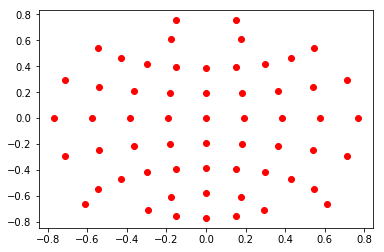

In [147]:
plt.plot(f['mnt']['x'], f['mnt']['y'], 'ro')
plt.show()

## cnt (data):

In [27]:
list(f['cnt'])

['T', 'clab', 'file', 'fs', 'title', 'x']

In [85]:
#unknown yet
#number of samples per each block
f['cnt']['T'][:]

array([[ 539974.],
       [ 539992.],
       [ 539974.]])

###  clab is the electrode names:

In [78]:
#channel labels, it represents th ascii of the chars
f['cnt']['clab']

<HDF5 dataset "clab": shape (69, 1), type "|O">

In [152]:
f['cnt']['clab'][0][0]

<HDF5 object reference>

In [247]:
f[h5py.h5r.get_name(f['cnt']['clab'][58][0], f.id)].value

array([[79],
       [49]], dtype=uint16)

In [192]:
def channel_labels():
    channels = []
    for i in range(69):
        l = len(f[h5py.h5r.get_name(f['cnt']['clab'][i][0], f.id)].value)
        channel = ''
        for j in range(l):
            channel += chr(f[h5py.h5r.get_name(f['cnt']['clab'][i][0], f.id)].value[j])
        #print(str(i) + ', ' + channel)
        channels.append(channel)
    return channels

In [193]:
channels = channel_labels()

In [102]:
df = pd.DataFrame(columns = channels)

In [103]:
df

,EOGv,Fp1,Fp2,AF3,AF4,EOGh,F7,F5,F3,F1,...,Oz,O2,EMGf,lead_gas,lead_brake,dist_to_lead,wheel_X,wheel_Y,gas,brake


### file is just file name:

In [194]:
f['cnt']['file']

<HDF5 dataset "file": shape (9, 1), type "<u2">

In [195]:
file = ''
for i in range(9):
    file += chr(f['cnt']['file'][i])
print(file)

VPsaj.mat


### fs is sampling rate:

In [108]:
f['cnt']['fs'][:]

array([[ 200.]])

### title:

In [190]:
title = ''
for i in range(23):
    title += chr(f['cnt']['title'][i])
print(title)

emergency braking VPsaj


### x is continuous multivariate data:

In [92]:
f['cnt']['x']

<HDF5 dataset "x": shape (69, 1619940), type "<f8">

In [104]:
def dataFrame_fill():
    for i in range(len(df.columns)):
        df[df.columns[i]] = f['cnt']['x'][i]

In [105]:
dataFrame_fill()

In [106]:
#dataframe sample
df[0:4]

,EOGv,Fp1,Fp2,AF3,AF4,EOGh,F7,F5,F3,F1,...,Oz,O2,EMGf,lead_gas,lead_brake,dist_to_lead,wheel_X,wheel_Y,gas,brake
0,0.629904,-1.648735,-1.802094,-1.905543,-1.904026,-1.078397,-1.901450,-1.829971,-2.004213,-1.702436,...,-1.460199,-1.774708,7.291278,0.0,0.0,0.0,0.0,0.0,0.0,-0.000111
1,2.519615,-7.269421,-8.309656,-8.524799,-8.518012,-4.583189,-8.106180,-7.908090,-9.018957,-7.811177,...,-6.205844,-7.986184,6.456735,0.0,0.0,0.0,0.0,0.0,0.0,-0.000266
2,6.676981,-18.435850,-22.125712,-22.164476,-22.046619,-11.233306,-20.815871,-20.195039,-23.349077,-20.329089,...,-15.879659,-20.941550,36.500316,0.0,0.0,0.0,0.0,0.0,0.0,0.000244
3,11.968173,-32.899749,-41.448166,-40.718450,-40.485609,-19.411152,-37.728766,-36.338000,-42.589518,-37.053020,...,-28.656396,-38.925255,4.304490,0.0,0.0,0.0,0.0,0.0,0.0,-0.000133


In [16]:
df.shape

(1619940, 69)

## mrk (braking event):

In [197]:
list(f['mrk'])

['className', 'event', 'time', 'y']

### ClassName:

In [203]:
f['mrk']['className'][0][0]

<HDF5 object reference>

In [44]:
def events():
    eventsList = []
    for i in range(5):
        l = len(f[h5py.h5r.get_name(f['mrk']['className'][i][0], f.id)].value)
        event = ''
        for j in range(l):
            event += chr(f[h5py.h5r.get_name(f['mrk']['className'][i][0], f.id)].value[j])
        print(str(i) + ', ' + event)
        eventsList.append(event)
    return eventsList

In [45]:
eventsList = events()

0, car_normal
1, car_brake
2, car_hold
3, car_collision
4, react_emg


### event: the time between car_brake and react_emg

In [22]:
f['mrk']['event']['react']

<HDF5 dataset "react": shape (1, 1146), type "<f8">

### time: timestamp for each event in milliseconds

In [115]:
f['mrk']['time'][0:2] #5294, 5365

array([[ 26470.],
       [ 26825.]])

### y: binary matrix telling which of the five types each event is

In [24]:
f['mrk']['y']

<HDF5 dataset "y": shape (1146, 5), type "<f8">

In [113]:
f['mrk']['y'][0:4]

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [107]:
def addEvents():
    y = ['-']*(1619940)
    for i in range(f['mrk']['y'].shape[0]):
        t = int(f['mrk']['time'][i]*(0.2))
        evIndex = np.where(f['mrk']['y'][i] == 1)[0][0]
        y[t] = (eventsList[evIndex])
    return y

In [108]:
y = addEvents()

In [109]:
df['y'] = y

cols = [0, 5, 61, 62, 63, 64, 65, 66, 67, 68]
df.drop(df.columns[cols], axis=1, inplace=True)

In [194]:
df[0:4]

,Fp1,Fp2,AF3,AF4,F7,F5,F3,F1,Fz,F2,...,P10,PO7,PO3,POz,PO4,PO8,O1,Oz,O2,y
0,-1.648735,-1.802094,-1.905543,-1.904026,-1.901450,-1.829971,-2.004213,-1.702436,-2.009347,-2.190422,...,-2.108614,-1.910360,-1.557860,-1.809201,-1.442225,-1.597648,-2.059600,-1.460199,-1.774708,-
1,-7.269421,-8.309656,-8.524799,-8.518012,-8.106180,-7.908090,-9.018957,-7.811177,-8.810213,-9.558205,...,-9.438560,-8.043623,-7.010370,-8.141403,-6.303059,-7.289268,-8.924931,-6.205844,-7.986184,-
2,-18.435850,-22.125712,-22.164476,-22.046619,-20.815871,-20.195039,-23.349077,-20.329089,-23.030206,-24.791595,...,-24.399681,-19.606330,-17.986202,-21.006830,-16.345221,-19.271627,-22.913045,-15.879659,-20.941550,-
3,-32.899749,-41.448166,-40.718450,-40.485609,-37.728766,-36.338000,-42.589518,-37.053020,-42.273567,-45.700168,...,-44.280903,-33.682670,-32.573438,-38.495770,-30.233317,-36.246636,-41.706890,-28.656396,-38.925255,-


### Selected electrodes:

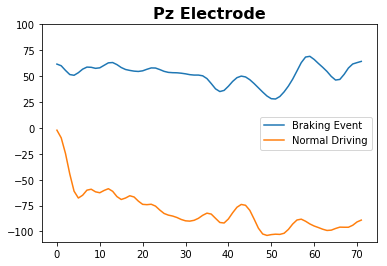

In [191]:
Pz_brake= f['cnt']['x'][47][5294:5366]
Pz_no_brake = f['cnt']['x'][47][0:72]
plt.title("Pz Electrode", fontsize=16, fontweight='bold')
plt.ylim(-110, 100)
plt.plot(Pz_brake, label="Braking Event")
plt.plot(Pz_no_brake, label="Normal Driving")
plt.legend(loc='center right')
plt.show()

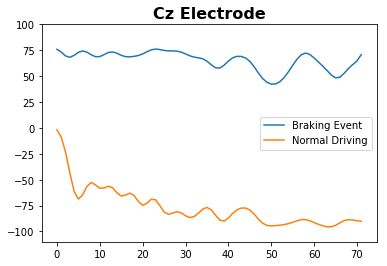

In [188]:
Cz_brake= f['cnt']['x'][28][5294:5366]
Cz_no_brake = f['cnt']['x'][28][0:72]
plt.title("Cz Electrode", fontsize=16, fontweight='bold')
plt.ylim(-110, 100)
plt.plot(Cz_brake, label="Braking Event")
plt.plot(Cz_no_brake, label="Normal Driving")
plt.legend()
plt.show()

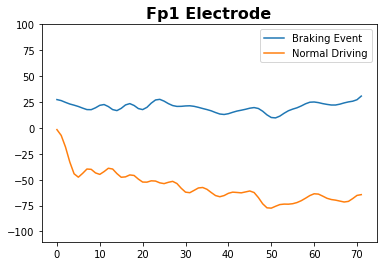

In [186]:
Fp1_brake= f['cnt']['x'][1][5294:5366]
Fp1_no_brake = f['cnt']['x'][1][0:72]
plt.title("Fp1 Electrode", fontsize=16, fontweight='bold')
plt.ylim(-110, 100)
plt.plot(Fp1_brake, label="Braking Event")
plt.plot(Fp1_no_brake, label="Normal Driving")
plt.legend()
plt.show()

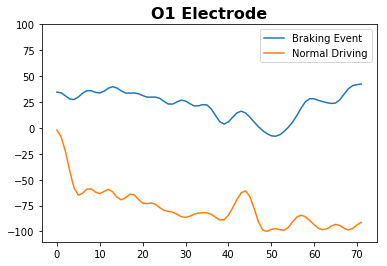

In [184]:
O1_brake= f['cnt']['x'][58][5294:5366]
O1_no_brake = f['cnt']['x'][58][0:72]
plt.title("O1 Electrode", fontsize=16, fontweight='bold')
plt.ylim(-110, 100)
plt.plot(O1_brake, label="Braking Event")
plt.plot(O1_no_brake, label="Normal Driving")
plt.legend()
plt.show()